In [245]:
import numpy as np
import pandas as pd
from scipy.stats import binom
import matplotlib.pyplot as pp
#question 2 part 1 function that uses np.random.binomial
def is_one(x):
    if x == 1: return True
    else: return False
def coin_flip_prop(k, p, t):
    instance_array = np.random.binomial(k,p,t*50)
    only_ones = list(filter(is_one,instance_array))
    return len(only_ones)/(t*50)



In [246]:
prop_array = []
for i in range(1,201):
    prop_array.append(coin_flip_prop(1,.5,i))
num_spins = list(range(1,201))
print(num_spins)



[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200]


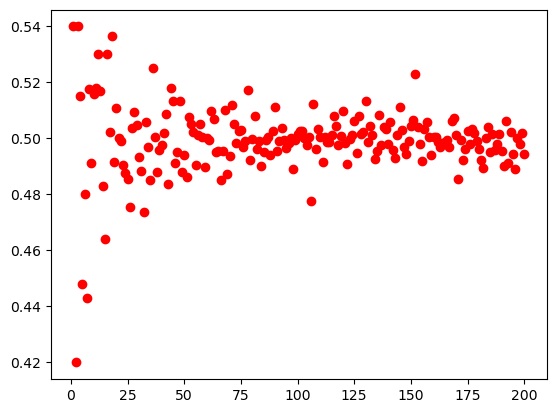

In [247]:
#question 2 part 1 visualization
pp.plot(num_spins, prop_array, "or")

In [248]:
#question 2 part 2 numerical calculation
#since each flip of each coin is independent of each other than multiplying 
#the probabilities yeilds the chance of having two heads
print(binom.pmf(2,5,.5))

0.31249999999999983


In [249]:
#question 2 part 3 average probability
print(sum(prop_array)/200) #200 is equal to number of observations when doing N from 1 .. 200

0.4993194640501742


In [250]:
#Question 3 part 1
data_frame1 = pd.read_csv("Country.csv",encoding = "ISO-8859-1")
data_frame2 = pd.read_csv("GDP.csv",encoding = "ISO-8859-1")
df_combine = data_frame1.merge(data_frame2,left_on = "CountryCode",right_on = "Country ID", how = "left")
#print(df_combine)
#df_combine.to_csv("merged_excel")
#There are 203 countries that have a GDP so 203 that were merged
print(len(df_combine[(df_combine["GDP"] != "..") & (pd.notnull(df_combine["GDP"]))]))
#all empty values are given 0 as a filler
df_combine["GDP"] = df_combine["GDP"].fillna(value="0")


203


In [252]:
#Question 3 part 2
asia = df_combine[df_combine["Region"] == "East Asia & Pacific"]
#print(asia)
print("East Asia & Pacific: ",len(asia))
europe = df_combine[df_combine["Region"] == "Europe & Central Asia"]
#print(europe)
print("Europe & Central Asia: ", len(europe))
latinamerica = df_combine[df_combine["Region"] == "Latin America & Caribbean"]
#print(europe)
print("Latin America & Caribbean: ", len(latinamerica))
middleeast = df_combine[df_combine["Region"] == "Middle East & North Africa"]

print("Middle East & North Africa: ", len(middleeast))
northamerica = df_combine[df_combine["Region"] == "North America"]

print("North America: ", len(northamerica))
southasia = df_combine[df_combine["Region"] == "South Asia"]

print("South Asia: ", len(southasia))
subafrica = df_combine[df_combine["Region"] == "Sub-Saharan Africa"]

print("Sub-Saharan Africa: ", len(subafrica))
regions = [asia, europe, latinamerica, middleeast, northamerica, southasia, subafrica]
regions_str = ["asia", "europe", "latinamerica", "middleeast", "northamerica", "southasia", "subafrica"]
len_regions = list(map(len,regions))
print("Most Countries: ", max(len_regions))
print("Least Countries: ", min(len_regions))

East Asia & Pacific:  36
Europe & Central Asia:  57
Latin America & Caribbean:  38
Middle East & North Africa:  21
North America:  3
South Asia:  8
Sub-Saharan Africa:  47
Most Countries:  57
Least Countries:  3


In [253]:
#Question 3 part 3
import locale
from scipy.stats import kstest, ks_1samp, ks_2samp
locale.setlocale(locale.LC_ALL, 'en_US.UTF-8')
def change_data(x):
    if x == '..': 
        return 0
    else:
        return locale.atoi(x)
regions_arrays = []
for i,y in zip(regions,range(7)):
    regions_arrays.append(list(map(change_data,i["GDP"])))
    #print("middle: ", sum(array)/(len(i)))
asia_array = regions_arrays[0]
europe_array = regions_arrays[1]
latin_array = regions_arrays[2]
middle_east_array = regions_arrays[3]
northa_array = regions_arrays[4]
south_asia_array = regions_arrays[5]
sub_africa_array = regions_arrays[6]

for i in range(7):
    for j in range(i+1,7):
        print(regions_str[i], ",",regions_str[j], ":",ks_2samp(regions_arrays[i],regions_arrays[j]))
#According to the KS tests, the regions (europe and middle east), (europe and southasia), (latin america and south asia), 
#(middle east and south asia), and (north america and south asia) are very likely similar and the regions at a 5% significance
#including the ones above that are similar are (asia and latin america), (asia and north america), (asia and south asia),
#(europe and latin america), (europe and north america), (latin america and north america), (middle east and north america), and 
#(north american and sub-saharan africa).
    


asia , europe : KstestResult(statistic=0.37719298245614036, pvalue=0.002529089435464832)
asia , latinamerica : KstestResult(statistic=0.28362573099415206, pvalue=0.07965006523291802)
asia , middleeast : KstestResult(statistic=0.44841269841269843, pvalue=0.006205833681378463)
asia , northamerica : KstestResult(statistic=0.6111111111111112, pvalue=0.17769996717365133)
asia , southasia : KstestResult(statistic=0.4722222222222222, pvalue=0.079352669077122)
asia , subafrica : KstestResult(statistic=0.3528368794326241, pvalue=0.008638586255632892)
europe , latinamerica : KstestResult(statistic=0.2543859649122807, pvalue=0.09261962490739233)
europe , middleeast : KstestResult(statistic=0.19548872180451127, pvalue=0.5298430439582013)
europe , northamerica : KstestResult(statistic=0.5789473684210527, pvalue=0.21145528930450036)
europe , southasia : KstestResult(statistic=0.17324561403508773, pvalue=0.9567942115317313)
europe , subafrica : KstestResult(statistic=0.49384098544232924, pvalue=2.888

In [254]:
#Question 3 Part 4
high_incomeOCD = list(map(change_data,(df_combine[df_combine["Income Group"] == "High income: OECD"]["GDP"])))
high_incomeNOCD = list(map(change_data,(df_combine[df_combine["Income Group"] == "High income: nonOECD"]["GDP"])))
low_income = list(map(change_data,(df_combine[df_combine["Income Group"] == "Low income"]["GDP"])))
low_mid = list(map(change_data,(df_combine[df_combine["Income Group"] == "Lower middle income"]["GDP"])))
upper_mid = list(map(change_data,(df_combine[df_combine["Income Group"] == "Upper middle income"]["GDP"])))

print("High income: OECD",np.quantile(high_incomeOCD, .25),np.quantile(high_incomeOCD, .50),np.quantile(high_incomeOCD, .75))
print("High income: nonOECD",np.quantile(high_incomeNOCD, .25),np.quantile(high_incomeNOCD, .50),np.quantile(high_incomeNOCD, .75))
print("Low income",np.quantile(low_income, .25),np.quantile(low_income, .50),np.quantile(low_income, .75))
print("Lower middle income",np.quantile(low_mid, .25),np.quantile(low_mid, .50),np.quantile(low_mid, .75))
print("Upper middle income",np.quantile(upper_mid, .25),np.quantile(upper_mid, .50),np.quantile(upper_mid, .75))
#The quantiles of each income group is below with the 25%, 50%, 75% reported respectively for each income. 


High income: OECD 211146.75 486528.5 1480047.25
High income: nonOECD 0.0 8149.0 43582.0
Low income 2937.0 7330.0 14984.0
Lower middle income 2123.25 21149.0 76264.0
Upper middle income 4692.5 42344.0 204789.5


In [255]:
#Question 4 part 1
df_titanic = pd.read_csv("Titanic_train.csv")
print(df_titanic.dtypes)


PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object


In [256]:
#Question 4 part 2
columns = list(df_titanic.columns)
for i in columns:
    num_null = len(list(filter(lambda x: pd.isnull(x),df_titanic[i])))
    print(i, "\nNumber of Nulls:", num_null, "\nTotal number in column: ", len(df_titanic[i]))
#Based on the numbers below. I think that the Cabin field would probably be ignored or deleted, because it is not a field
#that could be really approximated using averages or anything like that and there is more than 77% of the data not there.

#For the Embarked field, I think that the 2 missing values can be omitted because if they were added or eliminated it 
#won't effect the data too much.

#For the last field, Age, that has missing values, a test of the effect that ignoring the missing values or inputting numbers
#would have to be done to figure out what to do with the Age missing values
X0 = df_titanic["Age"].dropna()
X1=df_titanic["Age"].fillna(value=df_titanic["Age"].mean())
X2=df_titanic["Age"].fillna(value=df_titanic["Age"].median())
X3=df_titanic["Age"].fillna(value=0)
print("Drop =",round(X0.mean(),2))
print("Fill with Mean =",round(X1.mean(),2))
print("Fill with Median =",round(X2.mean(),2))
print("Fill with 0 =",round(X3.mean(),2))
#Based on the means and medians, I think that either ignoring the null values or inputting the values as the mean would be appropriate 

PassengerId 
Number of Nulls: 0 
Total number in column:  891
Survived 
Number of Nulls: 0 
Total number in column:  891
Pclass 
Number of Nulls: 0 
Total number in column:  891
Name 
Number of Nulls: 0 
Total number in column:  891
Sex 
Number of Nulls: 0 
Total number in column:  891
Age 
Number of Nulls: 177 
Total number in column:  891
SibSp 
Number of Nulls: 0 
Total number in column:  891
Parch 
Number of Nulls: 0 
Total number in column:  891
Ticket 
Number of Nulls: 0 
Total number in column:  891
Fare 
Number of Nulls: 0 
Total number in column:  891
Cabin 
Number of Nulls: 687 
Total number in column:  891
Embarked 
Number of Nulls: 2 
Total number in column:  891
Drop = 29.7
Fill with Mean = 29.7
Fill with Median = 29.36
Fill with 0 = 23.8


In [257]:
#Question 4 part 3
#The Cabin feature can be removed because 77% of the data values are missing, and there is no way to figure out
#what actual cabins anyone stayed in 

In [259]:
#Question 4 part 4
#The only two features that aren't already floats or ints that make sense to change from text to numbers are sex and embarked 
#since the can easily be changed since there are only two or three options, but the features that dont make sense are name and 
#ticket because they aren't formatted in a way that make is easy or convenient because the ticket feature has extras letters
#that are easy to understand what they mean and also names can't really be changed to numbers.
df_titanic["Sex"] = df_titanic["Sex"].str.replace("female", "1")
df_titanic["Sex"] = df_titanic["Sex"].str.replace("male", "0")
df_titanic["Sex"] = df_titanic["Sex"].astype(int)
print(df_titanic["Sex"])

df_titanic["Embarked"] = df_titanic["Embarked"].str.replace("C", "0")
df_titanic["Embarked"] = df_titanic["Embarked"].str.replace("Q", "1")
df_titanic["Embarked"] = df_titanic["Embarked"].str.replace("S", "2")
df_titanic["Embarked"] = df_titanic["Embarked"].fillna(value = "3")
df_titanic["Embarked"] = df_titanic["Embarked"].astype(int)
print(df_titanic["Embarked"])


0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    1
889    0
890    0
Name: Sex, Length: 891, dtype: int32
0      2
1      0
2      2
3      2
4      2
      ..
886    2
887    2
888    2
889    0
890    1
Name: Embarked, Length: 891, dtype: int32
